In [ ]:
#Predicting the probability of damage for four ML models: RF, GB, SG and ANN

In [ ]:
import geopandas as gpd
import pandas as pd
import numpy as np

In [ ]:
# Load Training Data from GeoJSON
input_geojson_path = r'D:\FOLDER FROM THESIS\THESIS\Processed data\Training ML\filled_manipulated_28_11.geojson'
data = gpd.read_file(input_geojson_path)

with pd.option_context('display.max_columns', None, 'display.max_rows', None):
    # Print the first 20 rows
    print("First 20 rows:")
    print(data.head(20))

    # Print the last 20 rows
    print("\nLast 20 rows:")
    print(data.tail(20))

In [ ]:
# Drop irrelevant fields
columns_to_drop = ['byg021BygningensAnvendelse', 'geometry', 'byg404Koordinat', 'byg406Koordinatsystem', 'x', 'y',
                  'maksimal5d', 'maksimal14', 'doegn10mm', 'doegn20mm', 'time2aarsh', 'time5aarsh', 
                  'time10aars', 'time20aars', 'time50aars', 'time100aar', 'doegn5aars', 'doegn10aar', 
                  'doegn20aar', 'doegn50aar', 'doegn100aa', 'toerredage', 'toerreperi', 'potentielf', 
                  'solindstra', 'dagligmint', 'lavestetem', 'gennemsn_1', 'gennemsnit', 'varmeboelg', 'doegnetste', 
                  'hedeboelge', 'hoejestete', 'vaekstsaes', 'ekstremvin', 'maksimaldo', 'skybrud', 
                  'aaretstemp', 'e_value', 'g_value', 'count', 'building', 'clay_accu_', 'streamlake', 'sand_accu']
data = data.drop(columns=columns_to_drop)

In [ ]:
# Applying one-hot encoding to categorical variables
data_encoded = pd.get_dummies(data, columns=[
    'byg032YdervæggensMateriale', 'byg033Tagdækningsmateriale', 'byg056Varmeinstallation', 
    'eta006BygningensEtagebetegnelse', 'landscape', 'TSYM', 'byg021BygningensAnvendelse_grouped'
])
with pd.option_context('display.max_columns', None, 'display.max_rows', None):
    # Print the first 20 rows
    print("First 20 rows:")
    print(data_encoded.head(20))

    # Print the last 20 rows
    print("\nLast 20 rows:")
    print(data_encoded.tail(20))

In [ ]:
# Split Data into Training and Validation Sets
X = data_encoded.drop('Damage', axis=1)  # Drop other unnecessary variables if needed
y = data_encoded['Damage']
X_train, X_validate, y_train, y_validate = train_test_split(X, y, test_size=0.20, random_state=42)

In [14]:
# load DK data
file_path = 'D:/FOLDER FROM THESIS/THESIS/Processed data/Joined variables/14.12/DK_processed1.geojson'
# Load the .geojson file into a GeoDataFrame
gdf = gpd.read_file(file_path)

# Print the first 20 rows
print("First 20 rows:")
print(gdf.head(20))

# Print the last 20 rows
print("\nLast 20 rows:")
print(gdf.tail(20))

First 20 rows:
    byg026Opførelsesår  byg027OmTilbygningsår byg032YdervæggensMateriale  \
0               1950.0                 -999.0                          1   
1               1800.0                 -999.0                          4   
2               1800.0                 1982.0                          4   
3               1999.0                 -999.0                          5   
4               1926.0                 -999.0                          1   
5               2003.0                 -999.0                          5   
6               1994.0                 -999.0                          5   
7               2004.0                 -999.0                          5   
8               1906.0                 -999.0                          4   
9               1800.0                 -999.0                          4   
10              1900.0                 -999.0                          1   
11              1950.0                 -999.0                          1 

In [15]:
# One-hot encoding categorical variables
categorical_vars = ['byg032YdervæggensMateriale', 'byg033Tagdækningsmateriale', 'byg056Varmeinstallation', 
                    'eta006BygningensEtagebetegnelse', 'landscape', 'TSYM', 'byg021BygningensAnvendelse_grouped']
gdf_encoded = pd.get_dummies(gdf, columns=categorical_vars)

# List all the feature variables used in the training dataset
used_features = ['byg026Opførelsesår', 'byg027OmTilbygningsår', 'eta020SamletArealAfEtage', 'byg054AntalEtager', 
                 'redoxgrid_code', 'b_div_c', 'landmovelandmove_idw25', 'dtm20', 'slope20', 'groundwate', 
                 'sand_depth', 'clay_depth', 'height_mea_2', 'areasqm_2', 'waterbodies', 'coast', 'bluespot', 
                 'doegn2aars', 'dagligmaxt', 'frostdoegn', 'middelvind'] + [f for f in list(gdf_encoded.columns) if f.startswith(tuple(categorical_vars))]

# Create a DataFrame for prediction without the 'geometry' column
gdf_for_prediction = gdf_encoded[used_features]

with pd.option_context('display.max_columns', None, 'display.max_rows', None):
    # Print the first 20 rows
    print("First 20 rows:")
    print(gdf_for_prediction.head(20))

    # Print the last 20 rows
    print("\nLast 20 rows:")
    print(gdf_for_prediction.tail(20))

First 20 rows:
    byg026Opførelsesår  byg027OmTilbygningsår  eta020SamletArealAfEtage  \
0               1950.0                 -999.0                    -999.0   
1               1800.0                 -999.0                    -999.0   
2               1800.0                 1982.0                    -999.0   
3               1999.0                 -999.0                    -999.0   
4               1926.0                 -999.0                     160.0   
5               2003.0                 -999.0                    -999.0   
6               1994.0                 -999.0                    -999.0   
7               2004.0                 -999.0                    -999.0   
8               1906.0                 -999.0                    -999.0   
9               1800.0                 -999.0                    -999.0   
10              1900.0                 -999.0                    -999.0   
11              1950.0                 -999.0                    -999.0   
12        

In [ ]:
#Random Forest

In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, roc_curve, precision_recall_curve
import matplotlib.pyplot as plt

# Train the Random Forest Model
rf_model = RandomForestClassifier(n_estimators=200, max_depth=60, min_samples_split=4, min_samples_leaf=1, random_state=42)
rf_model.fit(X_train, y_train)

# Generate Validation Outputs
predicted_probs_rf = rf_model.predict_proba(X_validate)[:, 1]
print(classification_report(y_validate, predicted_probs_rf.round()))

# ROC Curve
fpr_rf, tpr_rf, _ = roc_curve(y_validate, predicted_probs_rf)
plt.figure(figsize=(8, 6))
plt.plot(fpr_rf, tpr_rf, color='darkorange', lw=2)
plt.title('ROC Curve - Random Forest')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.show()

# Precision-Recall Curve
precision_rf, recall_rf, _ = precision_recall_curve(y_validate, predicted_probs_rf)
plt.figure(figsize=(8, 6))
plt.plot(recall_rf, precision_rf, color='blue', lw=2)
plt.title('Precision-Recall Curve - Random Forest')
plt.xlabel('Recall')
plt.ylabel('Precision')
plt.show()


In [ ]:
# Add Random Forest predictions to gdf under a different column name
damage_probabilities_rf = rf_model.predict_proba(gdf_for_prediction)[:, 1]
gdf['Damage_Probability_RF'] = damage_probabilities_rf

# Plotting Random Forest predictions
gdf.plot(column='Damage_Probability_RF', cmap='viridis', legend=True, markersize=10)
plt.title('Damage Probability Map - Random Forest')
plt.xlabel('X Coordinate')
plt.ylabel('Y Coordinate')
plt.show()

# Save the GeoDataFrame with Random Forest predictions as a GeoJSON
output_path_rf = 'D:/FOLDER FROM THESIS/THESIS/Processed data/Predictions/RF_probability.geojson'
gdf.to_file(output_path_rf, driver='GeoJSON')

print(f"Random Forest prediction map saved to {output_path_rf}")

In [ ]:
#For Gradient Boosting

              precision    recall  f1-score   support

           0       0.92      0.95      0.93     29390
           1       0.75      0.65      0.70      7003

    accuracy                           0.89     36393
   macro avg       0.84      0.80      0.82     36393
weighted avg       0.89      0.89      0.89     36393



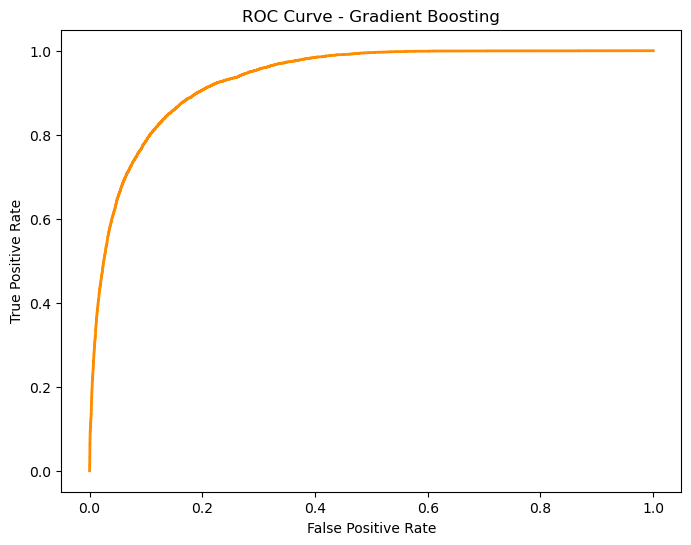

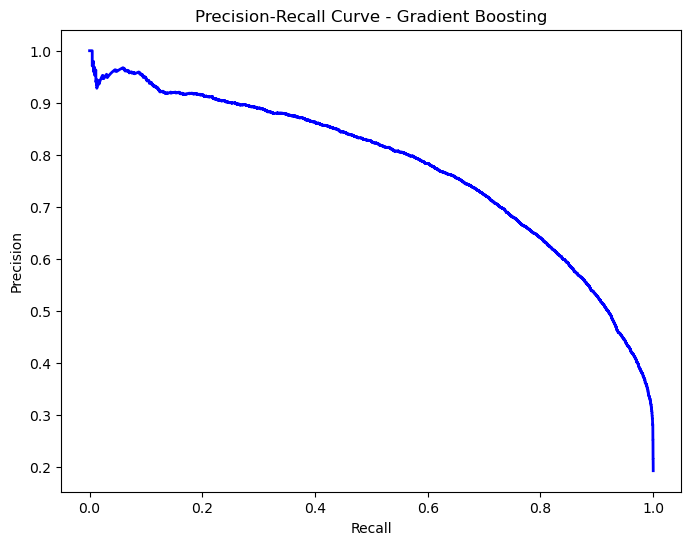

In [23]:
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.metrics import classification_report, roc_curve, precision_recall_curve
import matplotlib.pyplot as plt

# Train the Gradient Boosting Model
gb_model = GradientBoostingClassifier(
    n_estimators=900, 
    learning_rate=0.07333333333333333, 
    max_depth=8, 
    min_samples_split=10, 
    min_samples_leaf=5, 
    random_state=42
)
gb_model.fit(X_train, y_train)

# Generate Validation Outputs
predicted_probs_gb = gb_model.predict_proba(X_validate)[:, 1]
print(classification_report(y_validate, predicted_probs_gb.round()))

# ROC Curve
fpr_gb, tpr_gb, _ = roc_curve(y_validate, predicted_probs_gb)
plt.figure(figsize=(8, 6))
plt.plot(fpr_gb, tpr_gb, color='darkorange', lw=2)
plt.title('ROC Curve - Gradient Boosting')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.show()

# Precision-Recall Curve
precision_gb, recall_gb, _ = precision_recall_curve(y_validate, predicted_probs_gb)
plt.figure(figsize=(8, 6))
plt.plot(recall_gb, precision_gb, color='blue', lw=2)
plt.title('Precision-Recall Curve - Gradient Boosting')
plt.xlabel('Recall')
plt.ylabel('Precision')
plt.show()


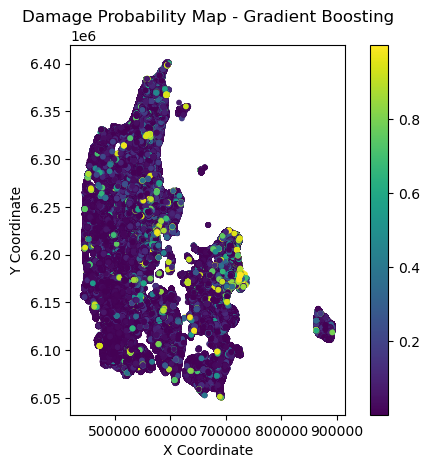

Gradient Boosting prediction map saved to D:/FOLDER FROM THESIS/THESIS/Processed data/Predictions/Gradient_B_probability.geojson


In [25]:
# Add Gradient Boosting predictions to gdf under a different column name
damage_probabilities_gb = gb_model.predict_proba(gdf_for_prediction)[:, 1]
gdf['Damage_Probability_GB'] = damage_probabilities_gb

# Plotting Gradient Boosting predictions
gdf.plot(column='Damage_Probability_GB', cmap='viridis', legend=True, markersize=10)
plt.title('Damage Probability Map - Gradient Boosting')
plt.xlabel('X Coordinate')
plt.ylabel('Y Coordinate')
plt.show()

# Save the GeoDataFrame with Gradient Boosting predictions as a GeoJSON
output_path_gb = 'D:/FOLDER FROM THESIS/THESIS/Processed data/Predictions/Gradient_B_probability.geojson'
gdf.to_file(output_path_gb, driver='GeoJSON')

print(f"Gradient Boosting prediction map saved to {output_path_gb}")



In [ ]:
#ANN

C:\Users\IM\anaconda3\Lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (20) reached and the optimization hasn't converged yet.
  warnings.warn(


              precision    recall  f1-score   support

           0       0.91      0.94      0.93     29390
           1       0.72      0.61      0.66      7003

    accuracy                           0.88     36393
   macro avg       0.82      0.78      0.79     36393
weighted avg       0.87      0.88      0.88     36393



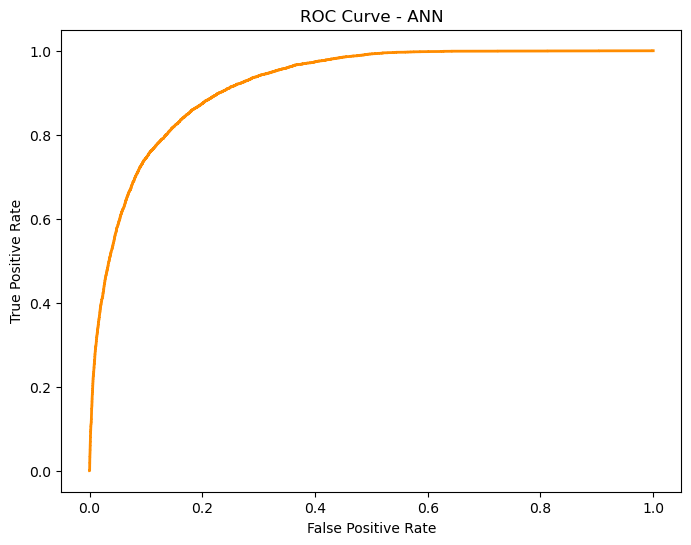

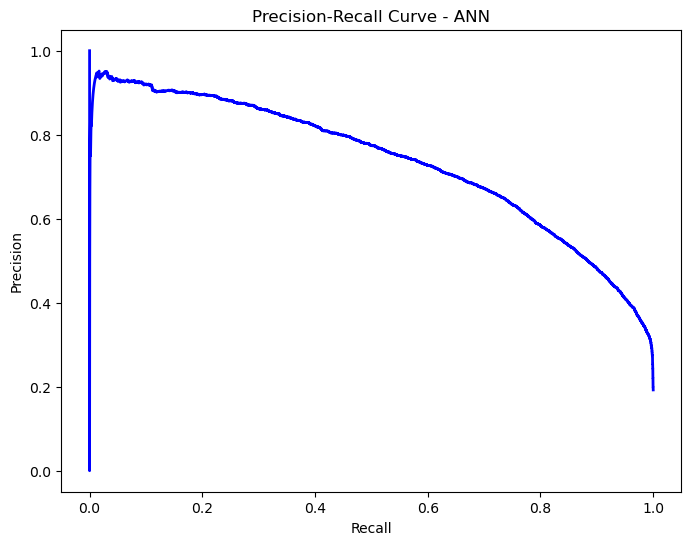

In [26]:
from sklearn.neural_network import MLPClassifier
from sklearn.metrics import classification_report, roc_curve, precision_recall_curve
import matplotlib.pyplot as plt

# Standardize the features (important for neural networks)
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_validate_scaled = scaler.transform(X_validate)

# Train the Artificial Neural Network Model
ann_model = MLPClassifier(
    hidden_layer_sizes=(128,),
    batch_size=128,
    max_iter=20,
    random_state=42
)
ann_model.fit(X_train_scaled, y_train)

# Generate Validation Outputs (probabilities for ANN might need to be handled differently)
predicted_probs_ann = ann_model.predict_proba(X_validate_scaled)[:, 1]
print(classification_report(y_validate, predicted_probs_ann.round()))

# ROC Curve
fpr_ann, tpr_ann, _ = roc_curve(y_validate, predicted_probs_ann)
plt.figure(figsize=(8, 6))
plt.plot(fpr_ann, tpr_ann, color='darkorange', lw=2)
plt.title('ROC Curve - ANN')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.show()

# Precision-Recall Curve
precision_ann, recall_ann, _ = precision_recall_curve(y_validate, predicted_probs_ann)
plt.figure(figsize=(8, 6))
plt.plot(recall_ann, precision_ann, color='blue', lw=2)
plt.title('Precision-Recall Curve - ANN')
plt.xlabel('Recall')
plt.ylabel('Precision')
plt.show()


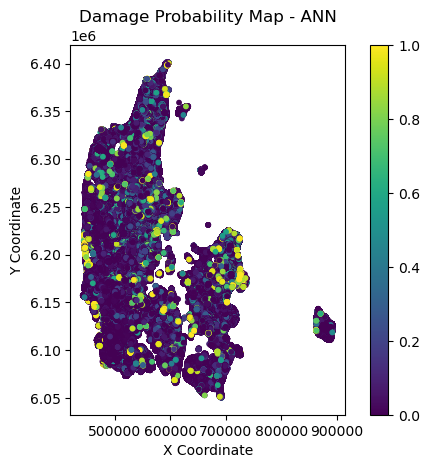

ANN prediction map saved to D:/FOLDER FROM THESIS/THESIS/Processed data/Predictions/ANN_probability.geojson


In [27]:
# Standardize gdf_for_prediction using the same scaler used for training
gdf_for_prediction_scaled = scaler.transform(gdf_for_prediction[X_train.columns])

# Add ANN predictions to gdf under a different column name
damage_probabilities_ann = ann_model.predict_proba(gdf_for_prediction_scaled)[:, 1]
gdf['Damage_Probability_ANN'] = damage_probabilities_ann

# Plotting ANN predictions
gdf.plot(column='Damage_Probability_ANN', cmap='viridis', legend=True, markersize=10)
plt.title('Damage Probability Map - ANN')
plt.xlabel('X Coordinate')
plt.ylabel('Y Coordinate')
plt.show()

# Save the GeoDataFrame with ANN predictions as a GeoJSON
output_path_ann = 'D:/FOLDER FROM THESIS/THESIS/Processed data/Predictions/ANN_probability.geojson'
gdf.to_file(output_path_ann, driver='GeoJSON')

print(f"ANN prediction map saved to {output_path_ann}")


In [28]:
#Stacked

[LightGBM] [Info] Number of positive: 28644, number of negative: 116926
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.017266 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 5117
[LightGBM] [Info] Number of data points in the train set: 145570, number of used features: 128
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.196771 -> initscore=-1.406597
[LightGBM] [Info] Start training from score -1.406597
[LightGBM] [Info] Number of positive: 25779, number of negative: 105234
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.018918 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 5111
[LightGBM] [Info] Number of data points in the train set: 131013, number of used features: 126
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.196767 -> initscore=-1.406626
[LightGBM] [Info] Start training from score -1.406626
[Light

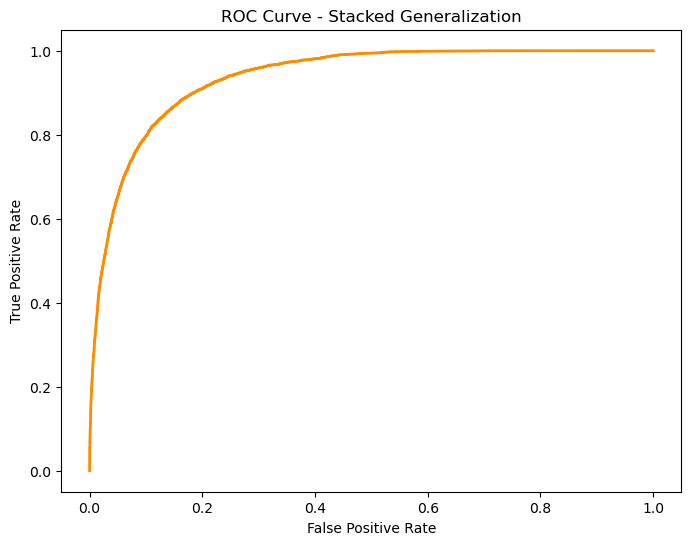

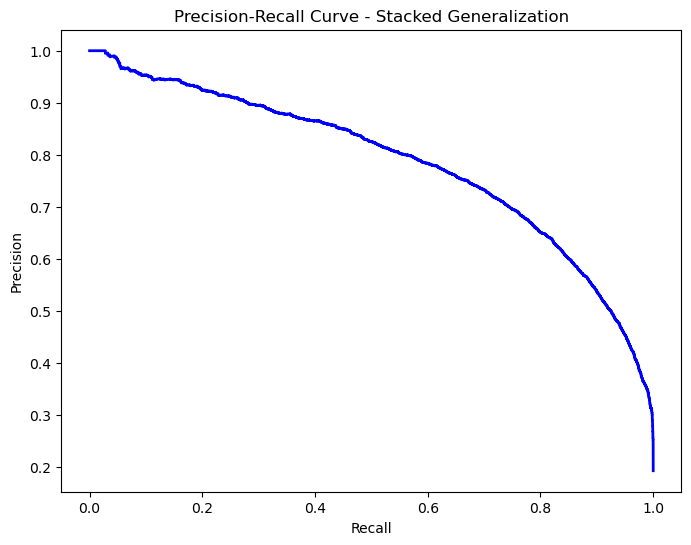

In [30]:
from sklearn.ensemble import StackingClassifier, RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from lightgbm import LGBMClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.metrics import classification_report, roc_curve, precision_recall_curve
import matplotlib.pyplot as plt

# Define base learners
base_learners = [
    ('rf', RandomForestClassifier(n_estimators=200, max_depth=60, min_samples_split=4, min_samples_leaf=1, random_state=42)),
    ('lgbm', LGBMClassifier(random_state=42)),
    ('gnb', GaussianNB())
]

# Define final estimator as Logistic Regression
final_estimator = LogisticRegression()

# Create the Stacking Classifier with Logistic Regression as the final estimator
stacked_model = StackingClassifier(estimators=base_learners, final_estimator=final_estimator, cv=10)

# Train the Stacked Model
stacked_model.fit(X_train, y_train)

# Generate Validation Outputs
predicted_probs_stacked = stacked_model.predict_proba(X_validate)[:, 1]
print(classification_report(y_validate, predicted_probs_stacked.round()))

# ROC Curve
fpr_stacked, tpr_stacked, _ = roc_curve(y_validate, predicted_probs_stacked)
plt.figure(figsize=(8, 6))
plt.plot(fpr_stacked, tpr_stacked, color='darkorange', lw=2)
plt.title('ROC Curve - Stacked Generalization')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.show()

# Precision-Recall Curve
precision_stacked, recall_stacked, _ = precision_recall_curve(y_validate, predicted_probs_stacked)
plt.figure(figsize=(8, 6))
plt.plot(recall_stacked, precision_stacked, color='blue', lw=2)
plt.title('Precision-Recall Curve - Stacked Generalization')
plt.xlabel('Recall')
plt.ylabel('Precision')
plt.show()


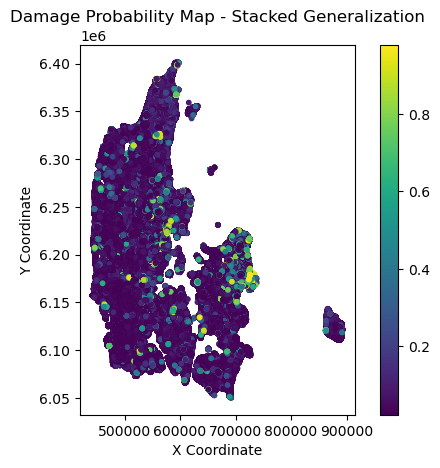

Stacked Generalization prediction map saved to D:/FOLDER FROM THESIS/THESIS/Processed data/Predictions/Stacked_G_probability.geojson


In [32]:
# Add Stacked Generalization predictions to gdf under a different column name
damage_probabilities_stacked = stacked_model.predict_proba(gdf_for_prediction)[:, 1]
gdf['Damage_Probability_Stacked'] = damage_probabilities_stacked

# Plotting Stacked Generalization predictions
gdf.plot(column='Damage_Probability_Stacked', cmap='viridis', legend=True, markersize=10)
plt.title('Damage Probability Map - Stacked Generalization')
plt.xlabel('X Coordinate')
plt.ylabel('Y Coordinate')
plt.show()

# Save the GeoDataFrame with Stacked Generalization predictions as a GeoJSON
output_path_stacked = 'D:/FOLDER FROM THESIS/THESIS/Processed data/Predictions/Stacked_G_probability.geojson'
gdf.to_file(output_path_stacked, driver='GeoJSON')

print(f"Stacked Generalization prediction map saved to {output_path_stacked}")


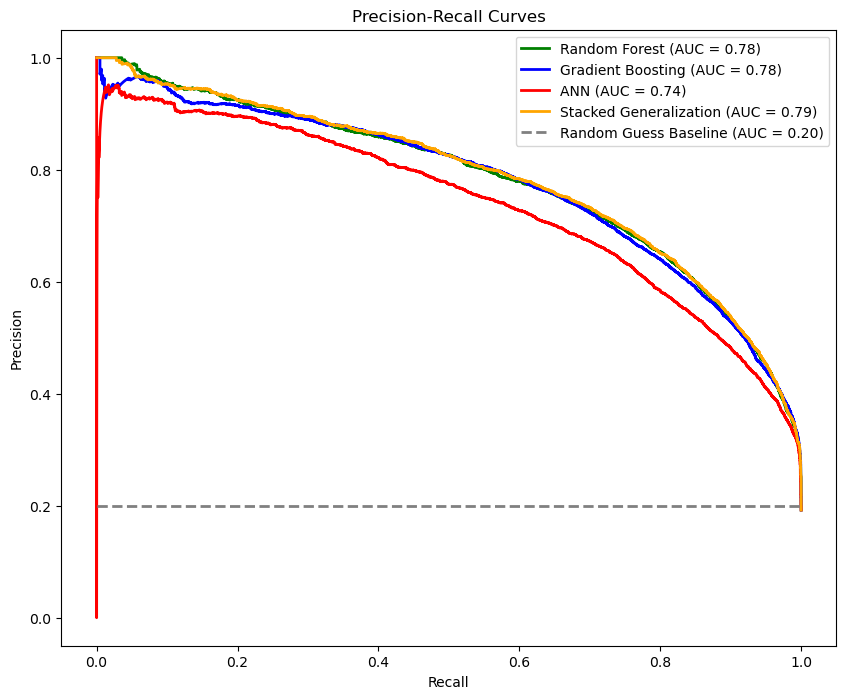

In [46]:
import matplotlib.pyplot as plt
from sklearn.metrics import precision_recall_curve, auc

# Plot Precision-Recall curves for all models
plt.figure(figsize=(10, 8))

# Random Forest
precision_rf, recall_rf, _ = precision_recall_curve(y_validate, predicted_probs)
auc_rf = auc(recall_rf, precision_rf)
plt.plot(recall_rf, precision_rf, label=f'Random Forest (AUC = {auc_rf:.2f})', lw=2, color='green')

# Gradient Boosting
precision_gb, recall_gb, _ = precision_recall_curve(y_validate, predicted_probs_gb)
auc_gb = auc(recall_gb, precision_gb)
plt.plot(recall_gb, precision_gb, label=f'Gradient Boosting (AUC = {auc_gb:.2f})', lw=2, color='blue')

# Artificial Neural Network
precision_ann, recall_ann, _ = precision_recall_curve(y_validate, predicted_probs_ann)
auc_ann = auc(recall_ann, precision_ann)
plt.plot(recall_ann, precision_ann, label=f'ANN (AUC = {auc_ann:.2f})', lw=2, color='red')

# Stacked Generalization
precision_stacked, recall_stacked, _ = precision_recall_curve(y_validate, predicted_probs_stacked)
auc_stacked = auc(recall_stacked, precision_stacked)
plt.plot(recall_stacked, precision_stacked, label=f'Stacked Generalization (AUC = {auc_stacked:.2f})', lw=2, color='orange')

# Random guess line
plt.plot([0, 1], [0.2, 0.2], linestyle='--', lw=2, color='gray', label='Random Guess Baseline (AUC = 0.20)')

# Add labels and legend
plt.title('Precision-Recall Curves')
plt.xlabel('Recall')
plt.ylabel('Precision')
plt.legend()
plt.show()
